## Pritish karmakar 21ms179

In [162]:
import math as m
import numpy as np
import matplotlib.pyplot as plt

In [163]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 100

In [164]:
from scipy.optimize import curve_fit

# Q1

In [187]:
def euler_sol(f,t_in,t_f,h,x_0):
    T = np.arange(t_in,t_f+h,h)
    X = np.zeros(len(T))
    X[0] = x_0
    
    for i in range(1,len(T)):
        X[i]= X[i-1] + h*f(X[i-1],T[i-1])
    
    return X

def midpt_sol(f,t_in,t_f,h,x_0):
    T = np.arange(t_in,t_f+h,h)
    X = np.zeros(len(T))
    X[0] = x_0
    
    for i in range(1,len(T)):
        k1 = h*f(X[i-1],T[i-1])
        X[i]= X[i-1] + h* f(X[i-1]+h/2, T[i-1]+k1/2)
        
    return X

Euler method:    x(t=15)= 0.60856596
Midpoint method: x(t=15)= 0.60781417
Exact method:    x(t=15)= 0.60653066


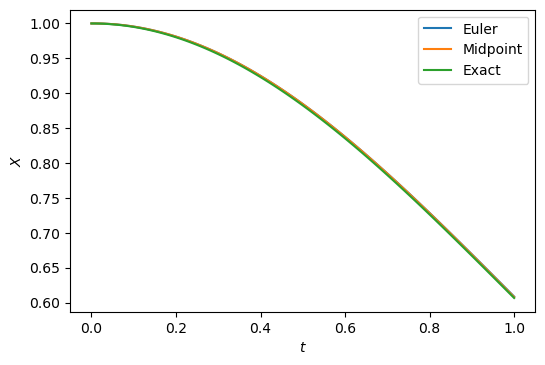

In [188]:
#a
f = lambda x,t: -x*t
t_in = 0
t_f = 1
x_0=1
h=0.01

# exact sol
y = lambda t: np.exp(-t**2/2)

X1 = euler_sol(f,t_in,t_f,h,x_0)
X2 = midpt_sol(f,t_in,t_f,h,x_0)
T = np.arange(t_in,t_f+h,h)
X3 = y(T)

print("Euler method:    x(t=15)=",round(X1[-1],8))
print("Midpoint method: x(t=15)=",round(X2[-1],8))
print("Exact method:    x(t=15)=",round(y(T)[-1],8))



plt.plot(T,X1,label='Euler')
plt.plot(T,X2,label='Midpoint')
plt.plot(T,X3,label='Exact')

plt.legend()
plt.ylabel('$X$')
plt.xlabel('$t$')
plt.show()

In [189]:
#b
N=np.arange(-4,-2+0.2,0.2)
H = [10**n for n in N]

f = lambda x,t: -x*t
t_in = 0
t_f = 1
x_0=1

X1_end=[euler_sol(f,t_in,t_f,h,x_0)[-1]  for h in H]
X2_end=[midpt_sol(f,t_in,t_f,h,x_0)[-1]  for h in H]

exact = y(T)[-1]

print("n\t euler_end_pt\t euler_error\t  midpt_end_pt   midpt_error\n")

for i in range(len(H)):
    print("%0.1f\t %0.8f\t %0.8f\t %0.8f\t %0.8f"
          %(N[i],X1_end[i],abs(X1_end[i]-exact),
            X2_end[i],abs(X2_end[i]-exact)))

n	 euler_end_pt	 euler_error	  midpt_end_pt   midpt_error

-4.0	 0.60655088	 0.00002022	 0.60654314	 0.00001248
-3.8	 0.60652170	 0.00000896	 0.60650943	 0.00002123
-3.6	 0.60644001	 0.00009065	 0.60642057	 0.00011009
-3.4	 0.60658374	 0.00005308	 0.60655296	 0.00002230
-3.2	 0.60661740	 0.00008674	 0.60656863	 0.00003797
-3.0	 0.60673297	 0.00020231	 0.60665578	 0.00012512
-2.8	 0.60681040	 0.00027974	 0.60668825	 0.00015759
-2.6	 0.60567796	 0.00085270	 0.60548357	 0.00104709
-2.4	 0.60537594	 0.00115472	 0.60506822	 0.00146244
-2.2	 0.60585321	 0.00067745	 0.60536882	 0.00116184
-2.0	 0.60856596	 0.00203531	 0.60781417	 0.00128351


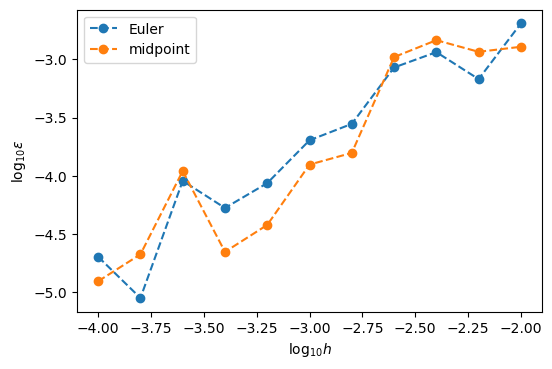

In [190]:
euler_error = np.abs(X1_end-exact)
midpt_error = np.abs(X2_end-exact)

euler_log_error = np.log10(euler_error)
midpt_log_error = np.log10(midpt_error)

plt.plot(N, euler_log_error, '--o', label='Euler')
plt.plot(N, midpt_log_error, '--o', label='midpoint')

plt.legend()
plt.ylabel('$\log_{10} \epsilon$')
plt.xlabel('$\log_{10} h$')
plt.show()

In [191]:
# fitting
def linear_fit(x_data,y_data, init_guess ):
    linear = lambda x,m,c: m*x +c
    param, covar = curve_fit(linear, x_data, y_data, p0=(init_guess[0],init_guess[1]))
    return param

In [192]:
init_guess = (0,0)
x_data =  N

print("slope for Euler    : %0.8f"
      %linear_fit(x_data, euler_log_error, init_guess)[0])
print("slope for Midpoint : %0.8f"
      %linear_fit(x_data, midpt_log_error, init_guess)[0])

slope for Euler    : 1.08019120
slope for Midpoint : 1.10661458


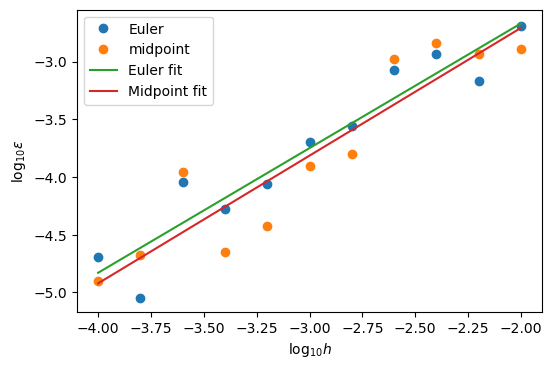

In [193]:
plt.plot(N, euler_log_error, 'o', label='Euler')
plt.plot(N, midpt_log_error, 'o', label='midpoint')

t=np.linspace(-4,-2,2000)
y1=linear_fit(x_data, euler_log_error, init_guess)[0]*t+linear_fit(x_data, euler_log_error, init_guess)[1]
y2=linear_fit(x_data, midpt_log_error, init_guess)[0]*t+linear_fit(x_data, midpt_log_error, init_guess)[1]

plt.plot(t,y1,label='Euler fit')
plt.plot(t,y2,label='Midpoint fit')

plt.legend()
plt.ylabel('$\log_{10} \epsilon$')
plt.xlabel('$\log_{10} h$')
plt.show()

# Q2

In [176]:
def c_euler_sol(f, t_in, t_f, h, x_0, p_0):
    T = np.arange(t_in,t_f+h,h)
    X = np.zeros(len(T))
    P = np.zeros(len(T))
    X[0] = x_0
    P[0] = p_0
    
    for i in range(1,len(T)):
        P[i]= P[i-1] + h*f(X[i-1])
        X[i]= X[i-1] + h*P[i-1]
    return X

def c_midpt_sol(f, t_in, t_f, h, x_0, p_0):
    T = np.arange(t_in,t_f+h,h)
    X = np.zeros(len(T))
    P = np.zeros(len(T))
    X[0] = x_0
    P[0] = p_0
    
    for i in range(1,len(T)):
        P[i]= P[i-1] + h* f(X[i-1]+h/2)
        
        
        X[i]= X[i-1] + h*(P[i-1]+P[i])/2
        
    return X

Euler method:    x(t=15)= 19.05591737
Midpoint method: x(t=15)= 4.40436747
Exact method:    x(t=15)= 1.0


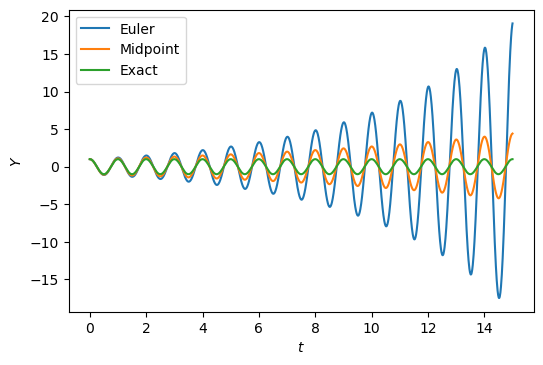

In [194]:
f = lambda x: -4*x*np.pi**2

t_in = 0
t_f = 15
x_0 = 1
p_0 = 0
h = 0.01

# exact sol
y1 = lambda t: np.cos(2*np.pi*t)

Y1 = c_euler_sol(f, t_in, t_f, h, x_0, p_0)
Y2 = c_midpt_sol(f, t_in, t_f, h, x_0, p_0)
T = np.arange(t_in,t_f+h,h)
Y3 = y1(T)

print("Euler method:    x(t=15)=",round(Y1[-1],8))
print("Midpoint method: x(t=15)=",round(Y2[-1],8))
print("Exact method:    x(t=15)=",round(y1(T)[-1],8))



plt.plot(T,Y1,label='Euler')
plt.plot(T,Y2,label='Midpoint')
plt.plot(T,Y3,label='Exact')

plt.legend()
plt.ylabel('$Y$')
plt.xlabel('$t$')
plt.show()

In [195]:
#b
N = np.arange(-4,-2+0.2,0.2)
H = [10**n for n in N]

Y1_end = [c_euler_sol(f, t_in, t_f, h, x_0, p_0)[-1]  for h in H]
Y2_end = [c_midpt_sol(f, t_in, t_f, h, x_0, p_0)[-1]  for h in H]

exact1 = y1(T)[-1]

print("n\t euler_end_pt\t euler_error\t midpt_end_pt   midpt_error\n")

for i in range(len(H)):
    print("%0.1f\t %0.8f\t %0.8f\t %0.8f\t %0.8f"
          %(N[i],Y1_end[i],abs(Y1_end[i]-exact1),
            Y2_end[i],abs(Y2_end[i]-exact1)))

n	 euler_end_pt	 euler_error	 midpt_end_pt   midpt_error

-4.0	 1.03005151	 0.03005151	 1.01491528	 0.01491528
-3.8	 1.04804541	 0.04804541	 1.02374264	 0.02374264
-3.6	 1.07720969	 0.07720969	 1.03789076	 0.03789076
-3.4	 1.12510394	 0.12510394	 1.06071936	 0.06071936
-3.2	 1.20541084	 0.20541084	 1.09793920	 0.09793920
-3.0	 1.34457976	 0.34457976	 1.15964275	 0.15964275
-2.8	 1.59882858	 0.59882858	 1.26463373	 0.26463373
-2.6	 2.10369366	 1.10369366	 1.45098284	 0.45098284
-2.4	 3.24889304	 2.24889304	 1.80436186	 0.80436186
-2.2	 6.46868766	 5.46868766	 2.54916741	 1.54916741
-2.0	 19.05591737	 18.05591737	 4.40436747	 3.40436747


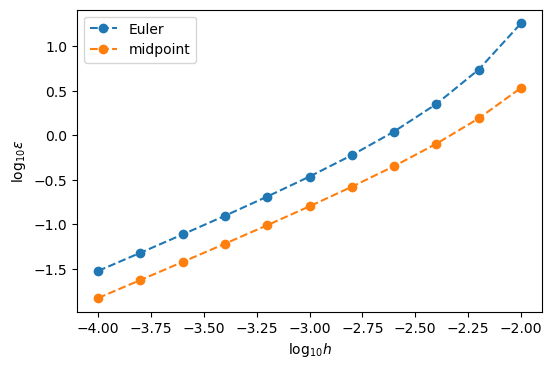

In [196]:
euler_error = np.abs(Y1_end-exact1)
midpt_error = np.abs(Y2_end-exact1)

euler_log_error = np.log10(euler_error)
midpt_log_error = np.log10(midpt_error)

plt.plot(N, euler_log_error, '--o', label='Euler')
plt.plot(N, midpt_log_error, '--o', label='midpoint')

plt.legend()
plt.ylabel('$\log_{10} \epsilon$')
plt.xlabel('$\log_{10} h$')
plt.show()

In [197]:
init_guess = (0,0)
x_data =  N

print("slope for Euler    : %0.8f"
      %linear_fit(x_data, euler_log_error, init_guess)[0])
print("slope for Midpoint : %0.8f"
      %linear_fit(x_data, midpt_log_error, init_guess)[0])

slope for Euler    : 1.31215530
slope for Midpoint : 1.14565508


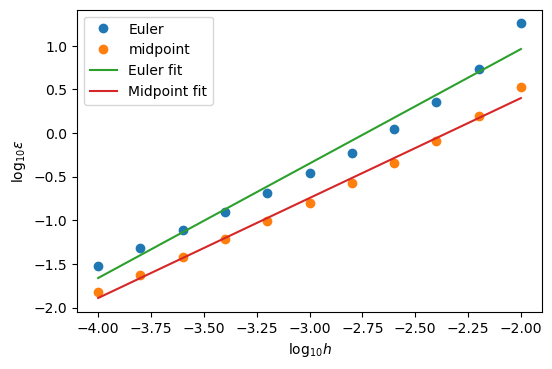

In [198]:
plt.plot(N, euler_log_error, 'o', label='Euler')
plt.plot(N, midpt_log_error, 'o', label='midpoint')

t=np.linspace(-4,-2,2000)
y1=linear_fit(x_data, euler_log_error, init_guess)[0]*t+linear_fit(x_data, euler_log_error, init_guess)[1]
y2=linear_fit(x_data, midpt_log_error, init_guess)[0]*t+linear_fit(x_data, midpt_log_error, init_guess)[1]

plt.plot(t,y1,label='Euler fit')
plt.plot(t,y2,label='Midpoint fit')

plt.legend()
plt.ylabel('$\log_{10} \epsilon$')
plt.xlabel('$\log_{10} h$')
plt.show()